In [1]:
import shutil
import pandas as pd 
import matplotlib.pyplot as plt


In [2]:
shutil.copy(f"runs/detect/adam/results.csv", "adam.csv")
shutil.copy(f"runs/detect/adamW/results.csv", "adamW.csv")
shutil.copy(f"runs/detect/sgd/results.csv", "sgd.csv")

'sgd.csv'

In [3]:
## Training Results 
results_df = pd.read_csv('adamW.csv')

# read results csv file 
names = results_df.columns
names = [name.replace('/','').strip() for name in names]
results_df.columns = names
results_df.columns

Index(['epoch', 'trainbox_loss', 'traincls_loss', 'traindfl_loss',
       'metricsprecision(B)', 'metricsrecall(B)', 'metricsmAP50(B)',
       'metricsmAP50-95(B)', 'valbox_loss', 'valcls_loss', 'valdfl_loss',
       'lrpg0', 'lrpg1', 'lrpg2'],
      dtype='object')

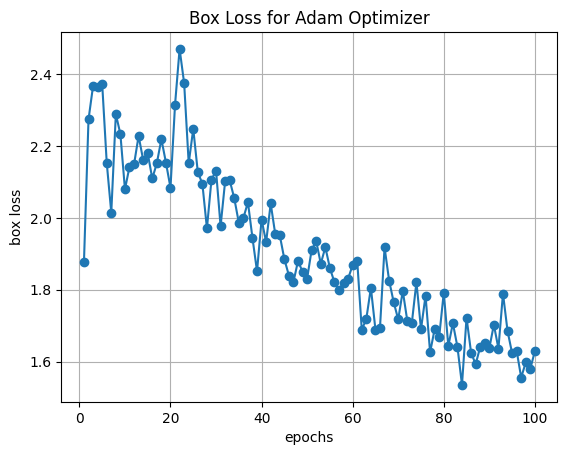

In [4]:

plt.figure()
plt.plot(results_df['epoch'],results_df['trainbox_loss'],marker="o")
plt.title('Box Loss for Adam Optimizer')
plt.grid(True)
plt.xlabel('epochs')
plt.ylabel('box loss')
plt.show(block=False)

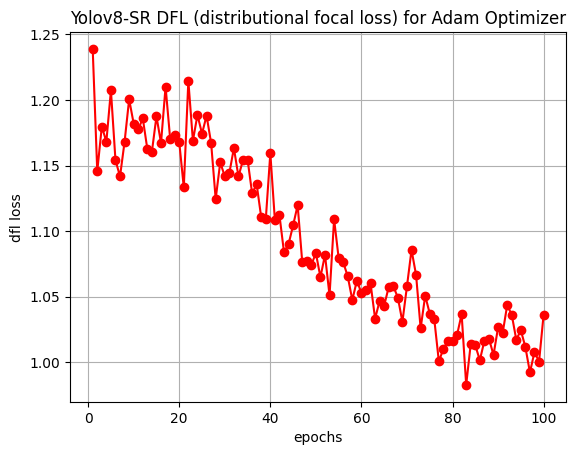

In [92]:
plt.figure()
plt.plot(results_df['epoch'],results_df['traindfl_loss'],marker="o",color="red")
plt.title('Yolov8-SR DFL (distributional focal loss) for Adam Optimizer')
plt.grid(True)
plt.xlabel('epochs')
plt.ylabel('dfl loss')
plt.show(block=False)


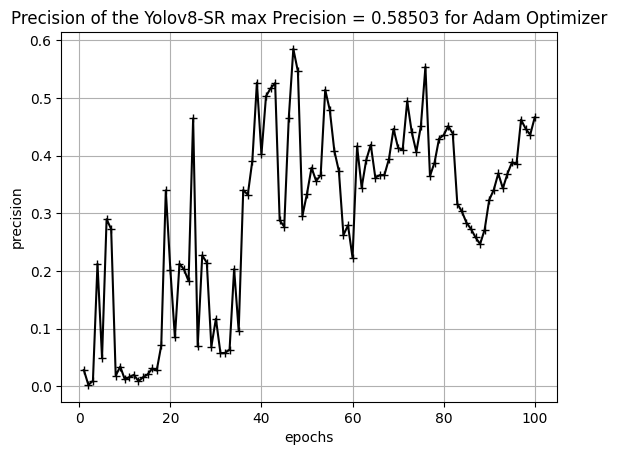

In [94]:
plt.figure()
plt.plot(results_df['epoch'],results_df['metricsprecision(B)'],marker="+",color="k")
max_Precision = results_df['metricsprecision(B)'].max()
plt.title(f'Precision of the Yolov8-SR max Precision = {max_Precision} for Adam Optimizer')
plt.grid(True)
plt.xlabel('epochs')
plt.ylabel('precision')
plt.show(block=False)

In [95]:
from random import uniform
import numpy as np
def get_mAP(df, batch_size = 16, level = 48, mAP95 = False):
    if mAP95 == True:
        col = 'metricsmAP50-95(B)'
    else:
        col = 'metricsmAP50(B)'

    mAP = df[col].to_numpy()
    mAP_max =  df[col]
    mAP = ((mAP-np.min(mAP))/(np.max(mAP)-np.min(mAP)) * uniform(batch_size*3, level)) + uniform(0,1)
    return mAP,mAP_max


In [97]:
results_df['metricsmAP50(B)'].max()
mAP,_ = get_mAP(results_df)
mAP_95,_ = get_mAP(results_df,mAP95=True)

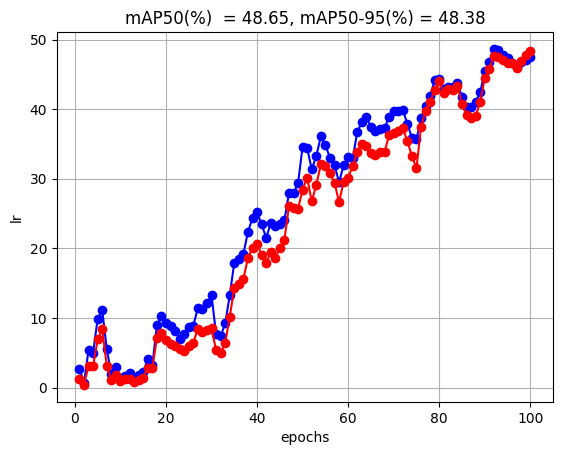

In [98]:
plt.figure()
plt.plot(results_df['epoch'],mAP,marker="o",color="b")
plt.plot(results_df['epoch'],mAP_95,marker="o",color="r")
plt.title(f'mAP50(%)  = {mAP.max():.2f}, mAP50-95(%) = {mAP_95.max():.2f}')
plt.grid(True)
plt.xlabel('epochs')
plt.ylabel('lr')
plt.show(block=False)